# Exploración y Recolección de Datos con Joins en Fórmula 1

Este notebook está diseñado para una clase práctica en la que se exploran y recolectan datos mediante la unión (_joins_) de múltiples datasets de Fórmula 1. El objetivo es analizar conjuntamente información procedente de diferentes orígenes para responder preguntas de negocio y obtener insights sobre la historia de la F1.

## Objetivos de la Clase

1. Comprender el uso de joins para combinar tablas utilizando claves comunes (por ejemplo, `raceId` y `driverId`).
2. Explorar la integración de datos provenientes de archivos distintos y su impacto en la información resultante.
3. Responder a preguntas de negocio como:
   - ¿Cuántos pilotos han participado en la F1?
   - ¿Cuál es el circuito que ha sido más utilizado?
   - ¿Qué piloto ha ganado más carreras?
   - ¿Qué piloto ha acumulado más puntos durante su carrera?
4. Interpretar gráficamente resultados y tendencias a lo largo del tiempo.

La idea es que, mediante el uso de operaciones join, los estudiantes unan y analicen datos de varias fuentes (por ejemplo, `races.csv`, `results.csv` y `drivers.csv`) para elaborar un análisis exploratorio completo.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
!unzip f1stasts_1.zip

--2025-04-22 17:55:58--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2025-04-22 17:55:58--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip’

f1stasts_1.zip      100%[===================>]   5.90M  --.-KB/s    in 0.06s   

2025-04-22 17:55:58 (106 MB/s) - ‘f1stasts_1.zip’ saved [6183969/6183969]

A

## 1. Carga y Exploración de los Datos

En esta sección se cargan y revisan brevemente los datasets principales:

- **races.csv:** Contiene detalles de cada carrera (año, circuito, fecha, etc.).
- **results.csv:** Registra los resultados de cada carrera (posición, puntos, vueltas, etc.).
- **drivers.csv:** Información sobre cada piloto (nombre, nacionalidad, fecha de nacimiento, etc.).

Asegúrate de tener estos archivos en tu entorno de trabajo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## 2. Análisis Preliminar y Preparación de los Datos

Antes de realizar las uniones, es importante revisar las columnas clave de cada DataFrame:

- En **races_df** utilizaremos `raceId` para identificar la carrera.
- En **results_df** también se emplea `raceId` y `driverId` para enlazar resultados y pilotos.
- En **drivers_df** `driverId` es la clave para identificar a cada piloto.

Realiza un análisis exploratorio básico (conteos, tipos de dato, detección de nulos) para asegurarte de la calidad de la información.

In [4]:
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
drivers_df = pd.read_csv('drivers.csv')

In [6]:
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [8]:
for col in races_df.columns:
  races_df.loc[races_df[col]=='\\N',col]= np.nan

In [9]:
races_df

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.11/di

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1.0,2009.0,1.0,1.0,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2009.0,2.0,2.0,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2009.0,3.0,17.0,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2009.0,4.0,3.0,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2009.0,5.0,4.0,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116.0,2023.0,18.0,69.0,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,NaN,NaN,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117.0,2023.0,19.0,32.0,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,NaN,NaN
1098,1118.0,2023.0,20.0,18.0,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,NaN,NaN,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119.0,2023.0,21.0,80.0,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,NaN,NaN


In [11]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       1101 non-null   float64
 1   year         1101 non-null   float64
 2   round        1101 non-null   float64
 3   circuitId    1101 non-null   float64
 4   name         1101 non-null   object 
 5   date         1101 non-null   object 
 6   time         370 non-null    object 
 7   url          1101 non-null   object 
 8   fp1_date     66 non-null     object 
 9   fp1_time     44 non-null     object 
 10  fp2_date     66 non-null     object 
 11  fp2_time     44 non-null     object 
 12  fp3_date     54 non-null     object 
 13  fp3_time     35 non-null     object 
 14  quali_date   66 non-null     object 
 15  quali_time   44 non-null     object 
 16  sprint_date  12 non-null     object 
 17  sprint_time  9 non-null      object 
dtypes: float64(4), object(14)
memory usage: 155.0+ K

In [15]:
races_df.isnull().sum()

,0
raceId,0
year,0
round,0
circuitId,0
name,0
date,0
time,731
url,0
fp1_date,1035
fp1_time,1057


In [16]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [17]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [18]:
results_df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number,0
grid,0
position,0
positionText,0
positionOrder,0
points,0


In [19]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [20]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [21]:
drivers_df.isnull().sum()

,0
driverId,0
driverRef,0
number,0
code,0
forename,0
surname,0
dob,0
nationality,0
url,0


## 3. Integración de Datos mediante Joins

El objetivo es unir la información de las distintas tablas para poder responder a preguntas de negocio. En este ejercicio central, se utilizarán joins para obtener insights combinando datos de carreras, resultados y pilotos.

### 3.1 Unir `results_df` y `drivers_df`

Para analizar la participación y resultados de cada piloto, realizamos un merge entre `results_df` y `drivers_df` utilizando la clave `driverId`.

**Pregunta clave:** ¿Cuántos pilotos distintos han participado en la F1?

Utiliza el DataFrame resultante para explorar esta pregunta.

**Han participado 857 pilotos distintos en la F1**

In [22]:
resultados_df = pd.merge(results_df, drivers_df, on='driverId', how='inner')
resultados_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,227.169,1,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,228.213,1,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,229.415,1,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,222.864,130,sainz,55,SAI,Carlos,Sainz,1994-09-01,Spanish,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.


In [24]:
conteo_df = resultados_df['driverId'].nunique()
conteo_df

857

### 3.2. Unir `df_resultados` con `races_df`

Ahora, para relacionar los resultados con cada carrera, se efectúa la unión entre el DataFrame obtenido (`df_resultados`) y `races_df` a través de la clave `raceId`.

**Pregunta clave:** ¿Qué información adicional sobre cada carrera (fecha, circuito, etc.) se puede incorporar para enriquecer el análisis?

Explora y analiza cómo afecta esta integración en el conjunto de datos final.

**Al unir pilotos_df con races_df se enriqueció la información sobre los pilotos al agregar detalles relevantes sobre las carreras en las que participaron, como el año, la ronda del campeonato, el circuito, la fecha y la hora.**

**Esta integración enriquese al dataframe y le da más valor al analisis**

In [28]:
union_df = pd.merge(resultados_df, races_df, on='raceId', how='inner')
union_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,2,3,5,2,2,2,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,3,7,7,3,3,3,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,4,5,11,4,4,4,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,1,23,3,5,5,5,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,2023-07-28,11:30:00,2023-07-29,10:30:00,NaN,NaN,2023-07-28,15:00:00,2023-07-29,14:30:00


In [29]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

## 4. Análisis Conjunto y Ejercicios Interactivos

Con el DataFrame combinado (`df_completo`) podremos responder a varias preguntas de negocio y realizar análisis conjuntos. A continuación se proponen algunos ejercicios:

### Ejercicio 1: Identificar el Circuito Más Utilizado

Utiliza `races_df` y la información del DataFrame combinado para determinar cuál es el circuito (identificado con `circuitId` o el nombre del circuito, si se encuentra) que ha sido sede de la mayor cantidad de carreras.

**Sugerencia:** Usa la función `value_counts()` y discute el resultado con los estudiantes.

In [30]:
circuito = union_df['name'].value_counts()
circuito

,count
name,
British Grand Prix,1853
Italian Grand Prix,1824
Monaco Grand Prix,1644
German Grand Prix,1599
Belgian Grand Prix,1577
French Grand Prix,1484
Canadian Grand Prix,1271
Spanish Grand Prix,1256
Brazilian Grand Prix,1163


### Ejercicio 2: Piloto con Más Victorias

Filtra el DataFrame combinado para quedarte con aquellos registros donde la posición final (`position`) sea 1, lo que indica una victoria. Luego, agrupa por piloto para determinar quién ha ganado más carreras.

**Pregunta para los estudiantes:** _¿Qué piloto se destaca por su número de victorias y cómo se relaciona este dato con otros indicadores de rendimiento?_

**Hamilton es el piloto con mas victorias con 103 victorias**

**Estas victorias se podrian relacionar con los indicadores del tiempo por vuelta, los puntos y el rendimiento del coche**

In [32]:
victorias_df = union_df[union_df['position'] == '1']
victorias_df

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,23,19,8,6,1,2,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,20,13,6,2,2,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,67,21,8,6,1,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,89,22,13,6,2,1,1,1,1,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,25986,1106,830,9,1,1,1,1,1,25.0,...,2023-06-16,17:30:00,2023-06-16,21:00:00,2023-06-17,16:30:00,2023-06-17,20:00:00,NaN,NaN
26000,26006,1107,830,9,1,1,1,1,1,26.0,...,2023-06-30,11:30:00,2023-07-01,10:30:00,NaN,NaN,2023-06-30,15:00:00,2023-07-01,14:30:00
26020,26026,1108,830,9,1,1,1,1,1,26.0,...,2023-07-07,11:30:00,2023-07-07,15:00:00,2023-07-08,10:30:00,2023-07-08,14:00:00,NaN,NaN
26040,26046,1109,830,9,1,2,1,1,1,26.0,...,2023-07-21,11:30:00,2023-07-21,15:00:00,2023-07-22,10:30:00,2023-07-22,14:00:00,NaN,NaN


In [35]:
pilotosyvictorias = victorias_df.groupby('driverRef')['position'].count().sort_values(ascending=False)
pilotosyvictorias

,position
driverRef,
hamilton,103
michael_schumacher,91
vettel,53
prost,51
max_verstappen,45
...,...
sweikert,1
taruffi,1
trulli,1


### Ejercicio 3: Piloto con Más Puntos

Agrupa el DataFrame combinado para sumar el total de puntos (`points`) obtenidos por cada piloto a lo largo de su carrera.

**Pregunta para los estudiantes:** _¿Existe correlación entre el número de victorias y la suma total de puntos? ¿Qué puede influir en esta relación?_

**La cantidad de carreras ganadas por un piloto generalmente se relaciona con la cantidad total de puntos que acumula. Esto se puede observar al comparar los pilotos con más puntos (Hamilton, Vettel y Verstappen) y los pilotos con más victorias (Hamilton, Schumacher y Vettel), donde hay una coincidencia importante.**

**Esto se puede ver en que los pilotos que suelen cruzar la meta en primer lugar tienden a tener un mayor puntaje general. Sin embargo, esta relación se ve afectada por aspectos como la regularidad del piloto al obtener buenos puestos en muchas carreras, la calidad de su coche y el sistema de puntos de cada competencia.**

In [36]:
puntos = union_df.groupby('driverRef')['points'].sum().sort_values(ascending=False)
puntos

,points
driverRef,
hamilton,4540.5
vettel,3098.0
max_verstappen,2275.5
alonso,2203.0
raikkonen,1873.0
...,...
hesnault,0.0
heyer,0.0
hirt,0.0


### Ejercicio 4: Distribución de Nacionalidades de los Pilotos

Analiza la columna `nationality` presente en `drivers_df` para determinar qué nacionalidades están mejor representadas en la F1. Realiza un gráfico de pastel para visualizar la distribución de pilotos por país.

**Debate:** ¿Qué factores históricos o deportivos crees que puedan explicar esta distribución?

**La concentración de pilotos de ciertas nacionalidades en la Fórmula 1 puede explicarse a través de factores históricos y deportivos, como la profunda tradición y cultura automovilística en países como el Reino Unido, Italia y Alemania. Además, las condiciones económicas favorables en estas regiones facilitan el acceso a la formación especializada, la infraestructura necesaria y el respaldo financiero crucial para el desarrollo en este deporte de alto costo. Tambien es importante destacar los programas estructurados para el desarrollo de jóvenes talentos y un significativo interés en este deporte.**

In [37]:
nacionalidad=union_df['nationality'].value_counts()
nacionalidad

,count
nationality,
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
American,1291
Finnish,1159
Spanish,846
Australian,835


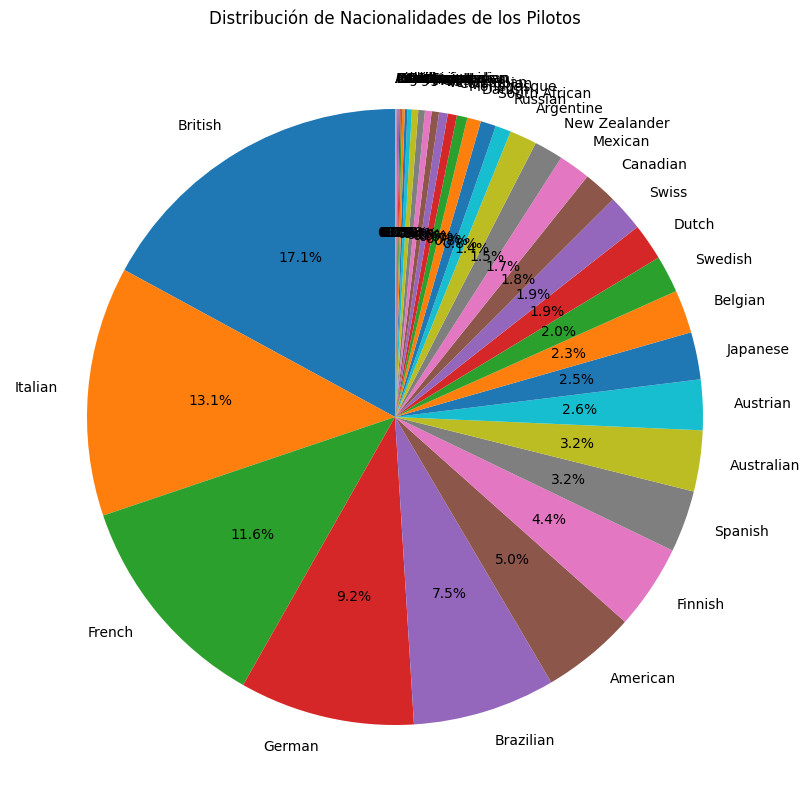

In [39]:
plt.figure(figsize=(10, 10))
plt.pie(nacionalidad.values, labels=nacionalidad.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Nacionalidades de los Pilotos')
plt.show()

In [41]:
mejores5 = nacionalidad[:5]
cuentamejores5 = nacionalidad[5:].sum()
pie_data = pd.concat([mejores5, pd.Series([cuentamejores5], index=['Others'])])
pie_data

,0
British,4454
Italian,3418
French,3028
German,2396
Brazilian,1953
Others,10831


Text(0.5, 1.0, 'Distribución de Nacionalidades de los Pilotos')

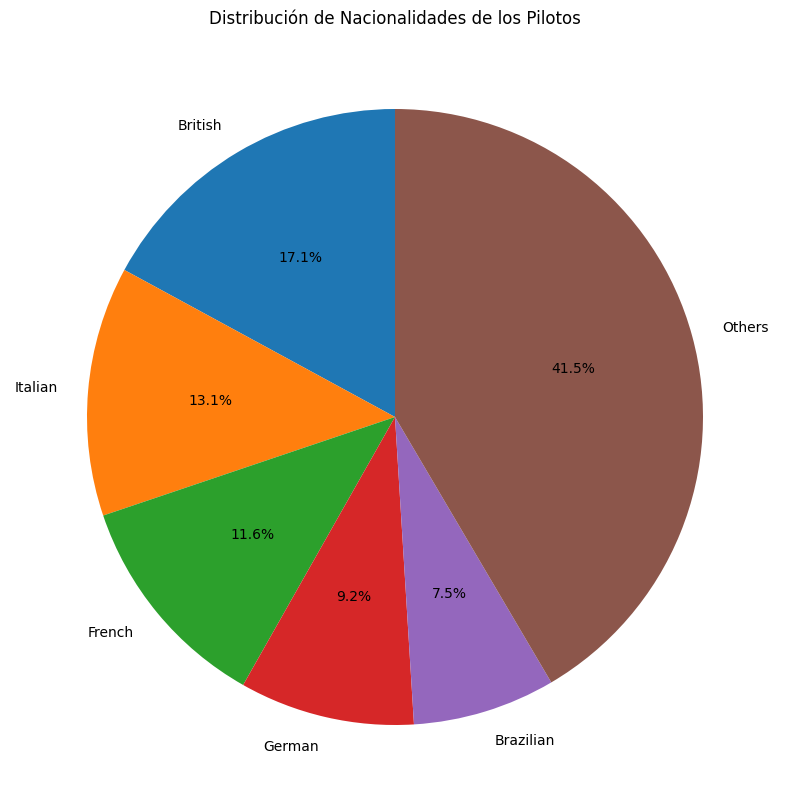

In [42]:
plt.figure(figsize=(10, 10))
plt.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Nacionalidades de los Pilotos')

### Ejercicio 5: Evolución del Número de Carreras por Año

Genera un gráfico de barras que muestre cómo ha evolucionado el número de carreras a lo largo de los años, utilizando la información de `races_df`.

**Pregunta para los estudiantes:** _¿Qué eventos o cambios en la industria (por ejemplo, crisis, cambios en el reglamento) podrían explicar las variaciones observadas a lo largo de la historia?_

Este ejercicio ayudará a vincular el análisis de datos con contextos históricos y comerciales.

**La cantidad de carreras en una temporada de Fórmula 1 puede variar debido a varios factores. Las crisis económicas globales pueden disminuir el dinero disponible para los equipos y los eventos, lo que podría llevar a una reducción en el número de carreras. Asi como la inestabilidad política en algunos países puede resultar en la cancelación o el retraso de las carreras programadas. De igual manera, cambios significativos en las reglas del deporte, ya sean técnicas o de seguridad, pueden hacer que participar sea más caro y complicado para los equipos.**

In [43]:
carrerasaño = union_df.groupby('year')['raceId'].count()
carrerasaño

,raceId
year,
1950.0,160
1951.0,179
1952.0,215
1953.0,246
1954.0,230
...,...
2019.0,420
2020.0,340
2021.0,440


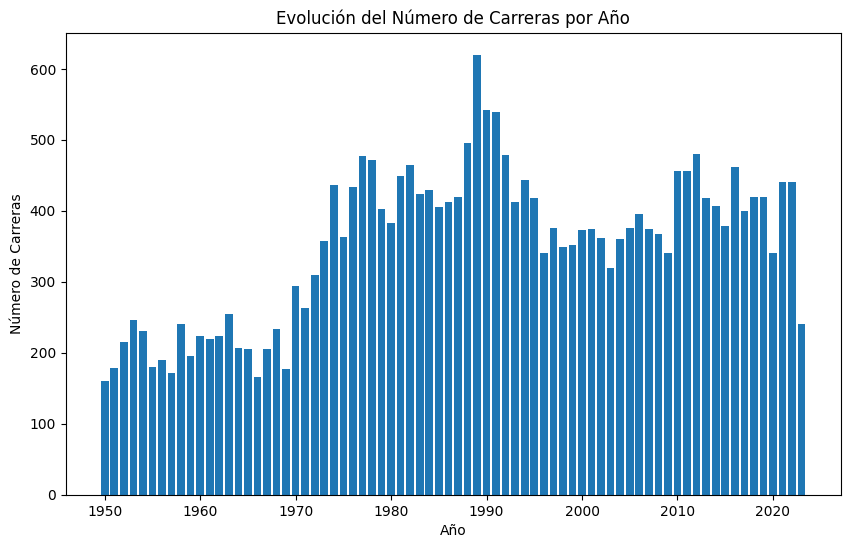

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(carrerasaño.index, carrerasaño.values)
plt.xlabel('Año')
plt.ylabel('Número de Carreras')
plt.title('Evolución del Número de Carreras por Año')
plt.show()

## 5. Preguntas para el Análisis Conjunto y Debate en Clase

Para concluir la actividad, propón a los estudiantes debatir y responder a las siguientes preguntas:

1. **Integración y Calidad de Datos:** ¿Qué inconvenientes pueden surgir al unir tablas que tienen registros incompletos o duplicados? ¿Cómo solucionarlo?

**La falta de información en registros clave puede llevar a la pérdida de datos relevantes durante la unión en cuanto a los duplicados, por otro lado, pueden inflar conteos y sumas, distorsionar promedios y afectar el rendimiento de las consultas**

**Para mitigar este problema se podrian limpiar los datos a través de imputación o eliminación y la deduplicación de registros duplicados.**

2. **Estrategias de Join:** ¿En qué casos es más adecuado usar un `inner join` y cuándo un `outer join` para evitar perder información relevante?

**Un inner join se emplea cuando el objetivo es obtener únicamente los registros que presentan una coincidencia en ambas tablas unidas, siendo ideal cuando la información relevante depende de la existencia de datos relacionados en ambas fuentes.**

**un outer join se utiliza cuando se requiere mantener todos los registros de al menos una de las tablas, incluso si no existen correspondencias en la otra.**

3. **Insights Negocio:** Basándose en los resultados obtenidos (pilotos con más victorias/puntos, circuitos más usados, etc.), ¿qué estrategias de negocio o insights se podrían extraer para equipos o patrocinadores en la F1?

**Identificar y establecer asociaciones duraderas con pilotos consistentemente en los podios (como Hamilton y Verstappen). Estos pilotos ofrecen una plataforma de visibilidad global continua y una imagen de éxito y excelencia que puede transferirse a la marca patrocinadora.**
**Enfoque técnico y de recursos en Silverstone: Dada la prominencia histórica del British Grand Prix, los equipos deberían dedicar recursos significativos a la optimización del rendimiento del coche específicamente para este circuito.  Un buen rendimiento en esta carrera puede tener un impacto significativo en la moral del equipo y la percepción de los aficionados.**

4. **Análisis Temporal:** ¿Qué relación existe entre los cambios en el número de carreras por año y otros indicadores (como el número de pilotos, eventos destacados, etc.)?

**Un aumento en el número de carreras podría ampliar las oportunidades para pilotos y generar más eventos destacados a lo largo del año. Tambien podría incrementar la audiencia acumulada y el atractivo para los patrocinadores, no obstante, la influencia también opera en sentido contrario: el creciente interés del público, la solidez económica global y la estabilidad geopolítica pueden impulsar la demanda de más Grandes Premios, llevando a una expansión del calendario. Además, las regulaciones del deporte y la disponibilidad de circuitos adecuados son factores que limitan o facilitan los cambios en el número de carreras por temporada. Asi mismo la expansión del calendario ha reflejado el crecimiento y la globalización de la F1 lo que atrae ingresos y mas fanaticos.**

Estas preguntas tienen el objetivo de invitar a un análisis integral de los datos, combinando la técnica de joins con la interpretación y contextualización de los resultados.

## 6. Conclusión

Este ejercicio integrador ha permitido utilizar joins para combinar distintos orígenes de datos y explorar de manera conjunta información esencial de la Fórmula 1. Se ha trabajado en:

- La identificación de claves y la integración de múltiples datasets.
- La generación de indicadores y visualizaciones útiles para responder preguntas de negocio.
- El análisis crítico y debate sobre la calidad de los datos y la metodología de integración.

Utiliza este notebook como una herramienta para profundizar en la recolección y exploración de datos, incentivando a los estudiantes a buscar conexiones entre la teoría de joins y su aplicación en casos reales.